# Simulator Outputs

In [1]:
from numpy import loadtxt, column_stack, subtract, multiply, divide, degrees
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline

# constants
LBF2N = 4.44822
FPS2MS = 0.3048

# Import data from JSBSim
columns = loadtxt('./JSBSim/data.csv', delimiter=',', comments='T', unpack=True)

sim_time   =                  columns[ 0]   # s
MET        =                  columns[ 1]   # s
alt        =                  columns[ 2]   # MSL, m
thrust     = multiply(LBF2N,  columns[ 5])  # N
pitch      =                  columns[ 7]   # deg
vel        = multiply(FPS2MS, columns[ 8])  # m/s
vel_down   = multiply(FPS2MS, columns[10])  # m/s
accel      = multiply(FPS2MS, columns[12])  # m/s

# Import data from OpenRocket
MET_or = []
alt_or = []
accel_or = []
vel_up_or = []
thrust_or = []
with open('./OpenRocket/output.csv', 'r') as f_in:
    for line in f_in.readlines():
        if line[0] == '#': continue
        li = line.split(',')
        MET_or.append(float(li[0]))
        alt_or.append(float(li[1]) * 1000.0)
        vel_up_or.append(float(li[2]))
        accel_or.append(float(li[3]))
        thrust_or.append(float(li[28]))

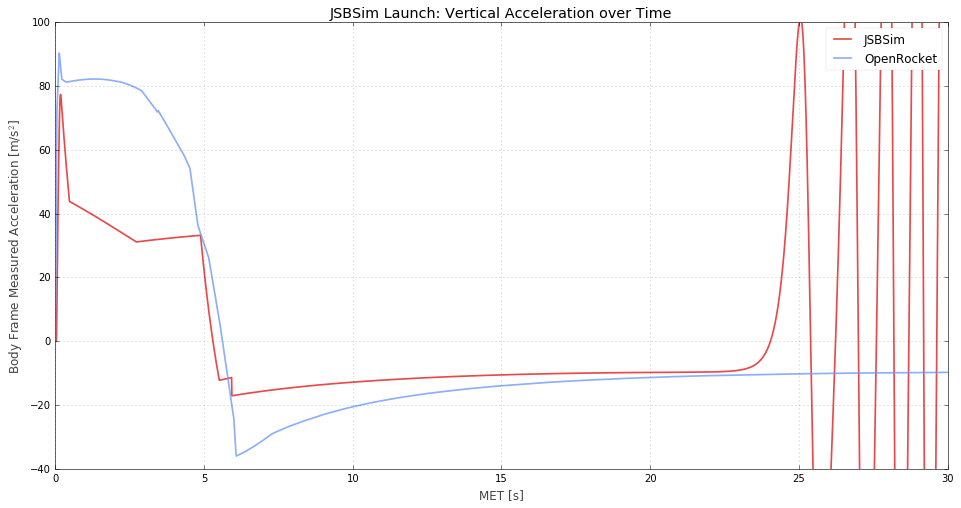

In [2]:
fig, ax1 = plt.subplots(figsize=(16,8))
plt.title(r"JSBSim Launch: Vertical Acceleration over Time")
plt.ylabel(r"Body Frame Measured Acceleration [m/s${}^2$]")
plt.xlabel(r"MET [s]")

plt.plot(MET, accel, alpha=0.8, label="JSBSim")
plt.plot(MET_or, accel_or, alpha=0.8, label="OpenRocket")

plt.ylim([-40, 100])
plt.xlim([0, 30])
ax1.legend(loc=1)
plt.show()

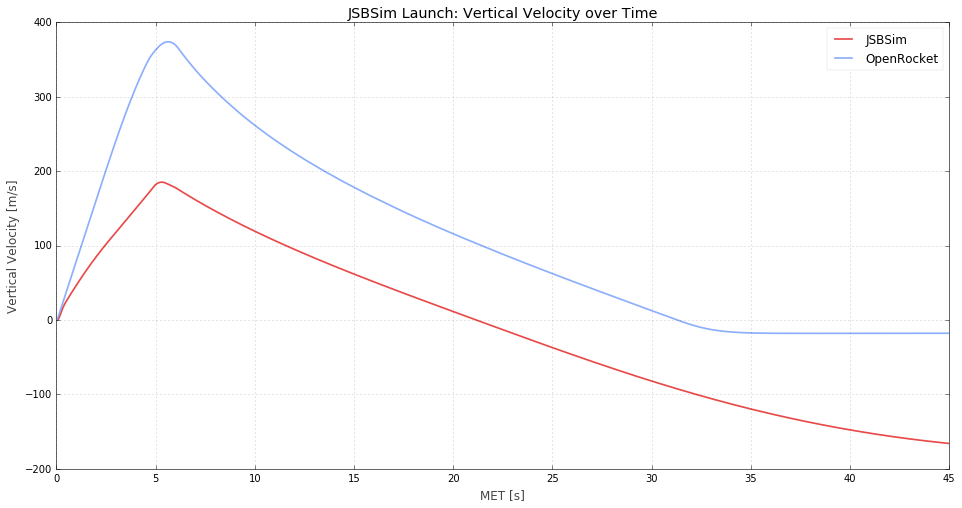

In [3]:
fig, ax1 = plt.subplots(figsize=(16,8))
plt.title(r"JSBSim Launch: Vertical Velocity over Time")
plt.ylabel(r"Vertical Velocity [m/s]")
plt.xlabel(r"MET [s]")

plt.plot(MET, multiply(-1, vel_down), alpha=0.8, label="JSBSim")
plt.plot(MET_or, vel_up_or, alpha=0.8, label="OpenRocket")

#plt.ylim([-40, 100])
plt.xlim([0, 45])
ax1.legend(loc=1)
plt.show()

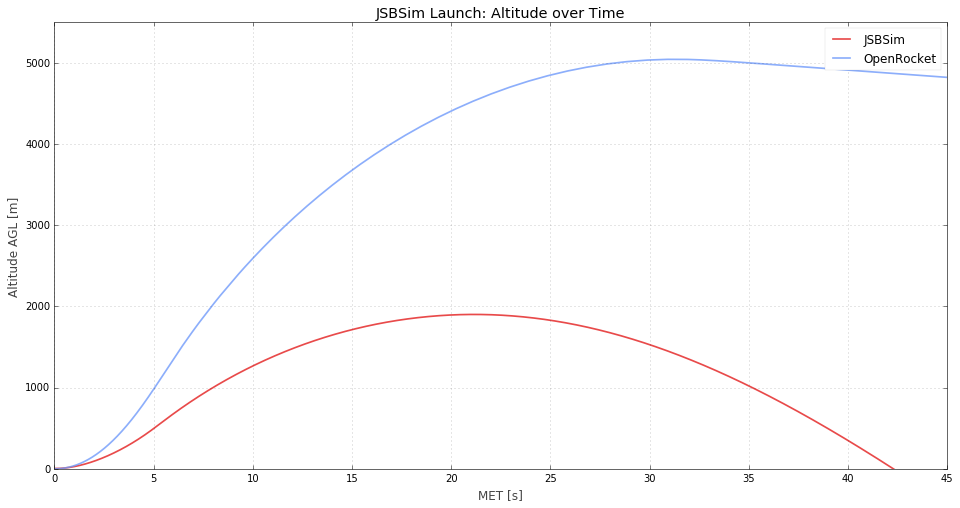

In [4]:
fig, ax1 = plt.subplots(figsize=(16,8))
plt.title(r"JSBSim Launch: Altitude over Time")
plt.ylabel(r"Altitude AGL [m]")
plt.xlabel(r"MET [s]")

plt.plot(MET, subtract(alt, 1390), alpha=0.8, label="JSBSim")
plt.plot(MET_or, alt_or, alpha=0.8, label="OpenRocket")

plt.ylim([0, 5500])
plt.xlim([0, 45])
ax1.legend(loc=1)
plt.show()

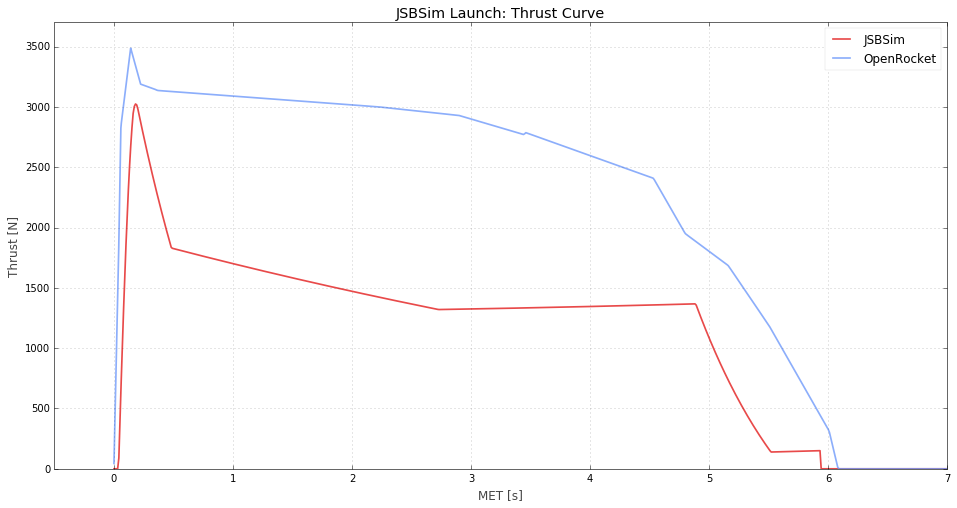

In [5]:
fig, ax1 = plt.subplots(figsize=(16,8))
plt.title(r"JSBSim Launch: Thrust Curve")
plt.ylabel(r"Thrust [N]")
plt.xlabel(r"MET [s]")

plt.plot(MET, thrust, alpha=0.8, label="JSBSim")
plt.plot(MET_or, thrust_or, alpha=0.8, label="OpenRocket")

plt.ylim([0, 3700])
plt.xlim([-0.5, 7])
ax1.legend(loc=1)
plt.show()